In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use for better display of tables
from IPython.display import display, HTML

# Load Excel file (update filename accordingly)
df = pd.read_excel("../data/VM_Details.xlsx")  # e.g., "vm_storage.xlsx"

In [10]:
# Convert memory to GB
df['MemoryAssignedGB'] = df['MemoryAssignedMB'] / 1024

# Compute storage utilization %
df['StorageUtilizationPercent'] = (df['TotalSizeConsumedGB'] / df['TotalSizeAssignedGB']) * 100

# Display first few rows
display(df.head())

,Name,ProcessorCount,MemoryAssignedMB,TotalSizeAssignedGB,TotalSizeConsumedGB,Location,VMHost,HasVMAdditions,IsHighlyAvailable,MemoryAssignedGB,StorageUtilizationPercent
0,BULK_PAYMENT,4,8192,120.0,14.13,C:\ClusterStorage\Volume3\bulk_payment\Virtual...,TZABLPRHYPV1,True,True,8.0,11.775000
1,BULK-SMS,4,8192,128.0,34.54,C:\ClusterStorage\Volume1\BULK-SMS\BULK-SMS,TZABLPRHYPV1,True,True,8.0,26.984375
2,CREDSCORE-UAT,2,8192,500.0,2.57,C:\ClusterStorage\Volume2\CREDSCORE-UAT\CREDSC...,TZABLPRHYPV1,True,True,8.0,0.514000
3,DBMS,4,8192,150.0,7.91,C:\ClusterStorage\Volume3\DBMS\DBMS,TZABLPRHYPV1,True,True,8.0,5.273333
4,DCENTRAL,4,8192,530.0,529.97,C:\ClusterStorage\Volume2\DCENTRAL\DCENTRAL\Vi...,TZABLPRHYPV1,True,True,8.0,99.994340


In [11]:
summary_stats = df[['MemoryAssignedGB', 'TotalSizeAssignedGB', 'TotalSizeConsumedGB', 'StorageUtilizationPercent']].describe()
display(summary_stats)

,MemoryAssignedGB,TotalSizeAssignedGB,TotalSizeConsumedGB,StorageUtilizationPercent
count,103.000000,103.000000,103.000000,103.000000
mean,17.800762,588.626699,146.545825,31.995050
std,15.943816,750.418707,240.917068,32.720073
min,0.000000,0.520000,0.000000,0.000000
25%,8.000000,150.000000,19.195000,4.666037
50%,16.000000,475.000000,49.610000,17.594401
75%,20.000000,600.000000,150.150000,50.707500
max,80.000000,4386.000000,1525.050000,100.000000


In [13]:
top10_util = df.sort_values(by='StorageUtilizationPercent', ascending=False).head(15)
display(HTML("<h4>Top 10 VMs by Storage Utilization (%)</h4>"))
display(top10_util[['Name', 'TotalSizeAssignedGB', 'TotalSizeConsumedGB', 'StorageUtilizationPercent']])

,Name,TotalSizeAssignedGB,TotalSizeConsumedGB,StorageUtilizationPercent
83,TISS LOCAL,100.00,100.00,100.000000
4,DCENTRAL,530.00,529.97,99.994340
80,TAXBANK-UAT,127.00,126.91,99.929134
59,TZABLPRJB01,150.00,149.51,99.673333
27,TZABLPRVIFMGR1,504.01,500.49,99.301601
71,FT PAYMENT GATEWAY,60.00,59.44,99.066667
11,TIPS_PROD,500.00,488.16,97.632000
81,TIPS UAT,500.00,484.88,96.976000
66,AVAULT,1024.02,988.63,96.544013
100,UMOJA PRODUCTION,150.00,140.22,93.480000


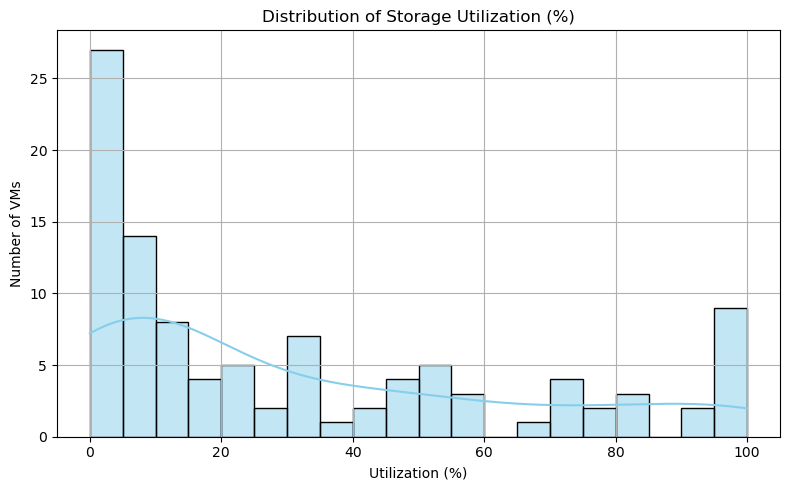

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['StorageUtilizationPercent'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Storage Utilization (%)")
plt.xlabel("Utilization (%)")
plt.ylabel("Number of VMs")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
high_util = df[df['StorageUtilizationPercent'] > 90]
low_util = df[df['StorageUtilizationPercent'] < 30]

print(f"🔢 Total VMs: {len(df)}")
print(f"📊 Average Storage Utilization: {df['StorageUtilizationPercent'].mean():.2f}%")
print(f"🔥 High Utilization VMs (>90%): {len(high_util)}")
print(f"🧊 Low Utilization VMs (<30%): {len(low_util)}")


🔢 Total VMs: 103
📊 Average Storage Utilization: 32.00%
🔥 High Utilization VMs (>90%): 11
🧊 Low Utilization VMs (<30%): 60
